In [1]:
from dipy.data import get_fnames
from nireports.reportlets.modality.dwi import plot_dwi, plot_gradients

from nifreeze.data import dmri

/home/oesteban/.miniconda/envs/nifreeze/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Get data from DIPY
fimg, fbvals, fbvecs = get_fnames(name="small_25")

# Load from NIfTI + b-vecs/vals
dwi = dmri.from_nii(
    fimg,
    bvec_file=fbvecs,
    bval_file=fbvals,
)

# Check number of DWIs (i.e., b > 0)
len(dwi)

25

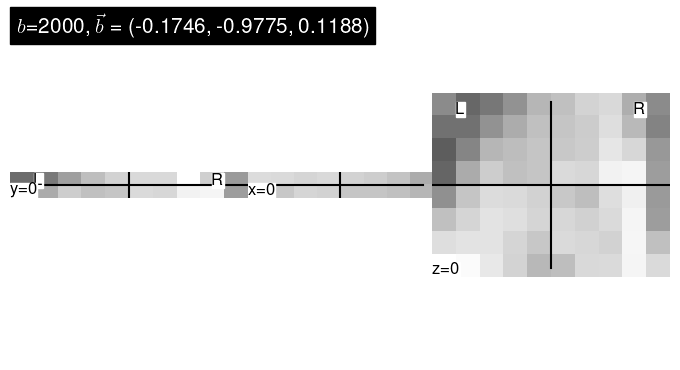

In [3]:
# Select item 10 (volume, head-motion affine, gradient)
data, _, grad = dwi[10]

# and plot
plot_dwi(data, dwi.affine, gradient=grad);

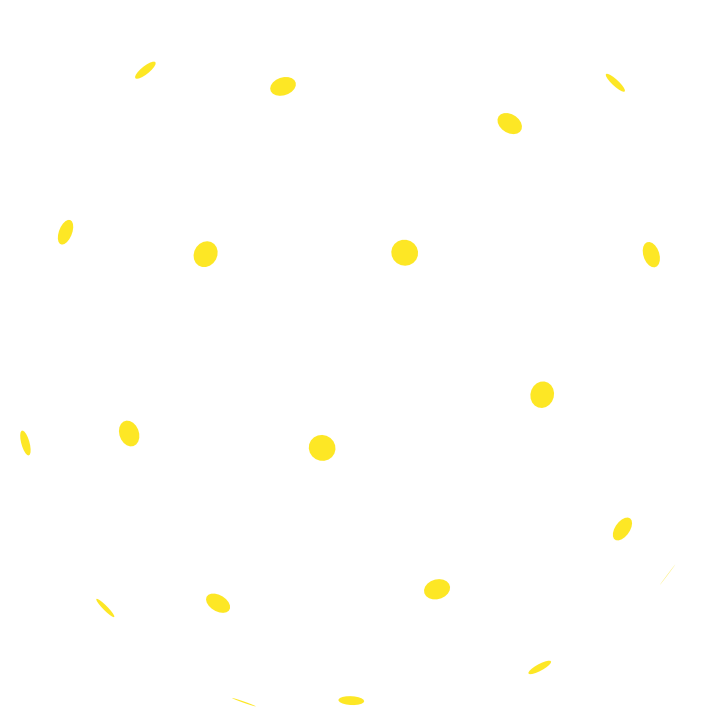

In [4]:
plot_gradients(dwi.gradients);

In [5]:
# Get data from DIPY
fimg, fbvals, fbvecs = get_fnames(name="sherbrooke_3shell")

# Load from NIfTI + b-vecs/vals
dwi = dmri.from_nii(
    fimg,
    bvec_file=fbvecs,
    bval_file=fbvals,
)

# Check number of DWIs (i.e., b > 0)
len(dwi)

192

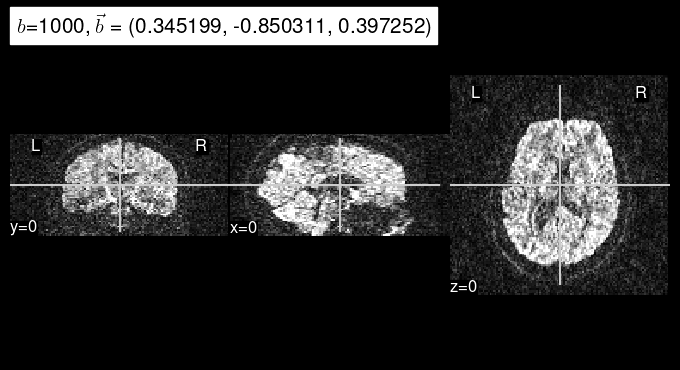

In [6]:
# Select item 10 (volume, head-motion affine, gradient)
data, _, grad = dwi[10]

# and plot
plot_dwi(data, dwi.affine, gradient=grad);

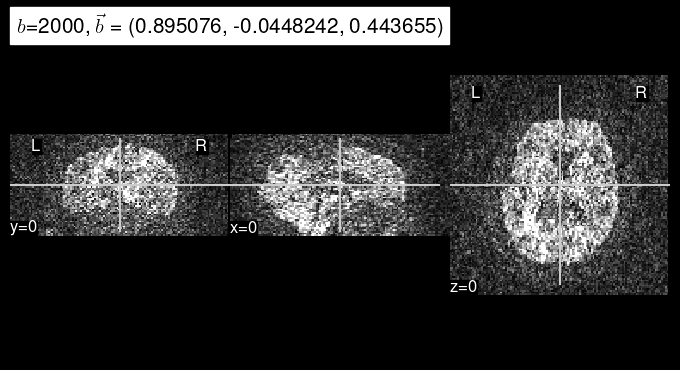

In [7]:
# Select item 80 (volume, head-motion affine, gradient)
data, _, grad = dwi[80]

# and plot
plot_dwi(data, dwi.affine, gradient=grad);

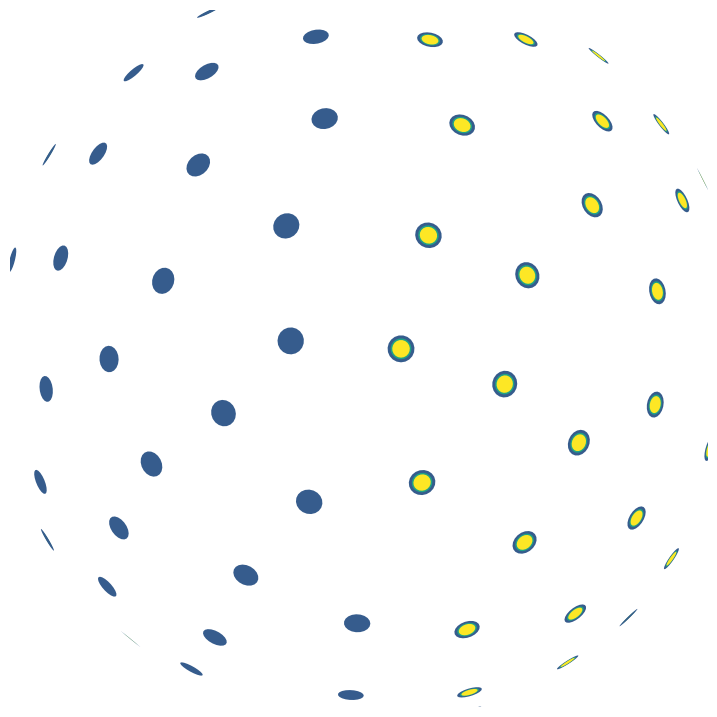

In [8]:
plot_gradients(dwi.gradients);

In [9]:
# Select a b-value
b2000_gradientmask = dwi.gradients[:, -1] == 2000

# Select b=2000
data, _, grad = dwi[b2000_gradientmask]

# Check correct filtering
data.shape[-1] == b2000_gradientmask.sum(), set(grad[-1, :]) == {2000.0}

(True, True)

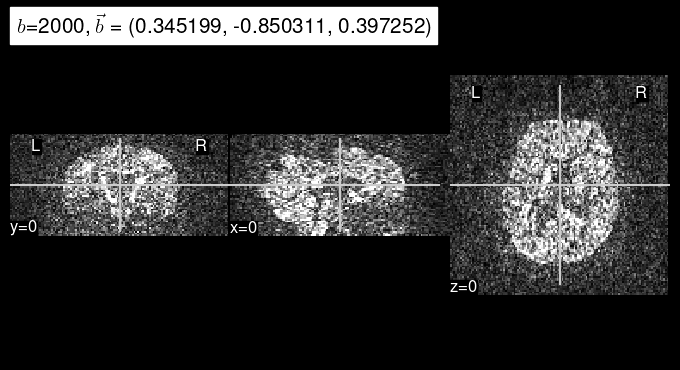

In [10]:
# Plot volume 10 of b=2000 shell
plot_dwi(data[..., 10], dwi.affine, gradient=grad[:, 10]);